Link
https://archive.ics.uci.edu/ml/datasets/Superconductivty+Data

Data Set Information:

There are two files: (1) train.csv contains 81 features extracted from 21263 superconductors along with the critical temperature in the 82nd column, (2) unique_m.csv contains the chemical formula broken up for all the 21263 superconductors from the train.csv file. The last two columns have the critical temperature and chemical formula. The original data comes from [Web Link] which is public. The goal here is to predict the critical temperature based on the features extracted.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('superconduct\\train.csv')

In [3]:
#eda
df.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 82 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   number_of_elements               21263 non-null  int64  
 1   mean_atomic_mass                 21263 non-null  float64
 2   wtd_mean_atomic_mass             21263 non-null  float64
 3   gmean_atomic_mass                21263 non-null  float64
 4   wtd_gmean_atomic_mass            21263 non-null  float64
 5   entropy_atomic_mass              21263 non-null  float64
 6   wtd_entropy_atomic_mass          21263 non-null  float64
 7   range_atomic_mass                21263 non-null  float64
 8   wtd_range_atomic_mass            21263 non-null  float64
 9   std_atomic_mass                  21263 non-null  float64
 10  wtd_std_atomic_mass              21263 non-null  float64
 11  mean_fie                         21263 non-null  float64
 12  wtd_mean_fie      

In [5]:
df.describe()


,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
count,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,...,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000
mean,4.115224,87.557631,72.988310,71.290627,58.539916,1.165608,1.063884,115.601251,33.225218,44.391893,...,3.153127,3.056536,3.055885,1.295682,1.052841,2.041010,1.483007,0.839342,0.673987,34.421219
std,1.439295,29.676497,33.490406,31.030272,36.651067,0.364930,0.401423,54.626887,26.967752,20.035430,...,1.191249,1.046257,1.174815,0.393155,0.380291,1.242345,0.978176,0.484676,0.455580,34.254362
min,1.000000,6.941000,6.423452,5.320573,1.960849,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000210
25%,3.000000,72.458076,52.143839,58.041225,35.248990,0.966676,0.775363,78.512902,16.824174,32.890369,...,2.116732,2.279705,2.091251,1.060857,0.775678,1.000000,0.921454,0.451754,0.306892,5.365000
50%,4.000000,84.922750,60.696571,66.361592,39.918385,1.199541,1.146783,122.906070,26.636008,45.123500,...,2.618182,2.615321,2.434057,1.368922,1.166532,2.000000,1.063077,0.800000,0.500000,20.000000
75%,5.000000,100.404410,86.103540,78.116681,73.113234,1.444537,1.359418,154.119320,38.356908,59.322812,...,4.026201,3.727919,3.914868,1.589027,1.330801,3.000000,1.918400,1.200000,1.020436,63.000000
max,9.000000,208.980400,208.980400,208.980400,208.980400,1.983797,1.958203,207.972460,205.589910,101.019700,...,7.000000,7.000000,7.000000,2.141963,1.949739,6.000000,6.992200,3.000000,3.000000,185.000000


In [6]:
df.isnull().sum()

number_of_elements       0
mean_atomic_mass         0
wtd_mean_atomic_mass     0
gmean_atomic_mass        0
wtd_gmean_atomic_mass    0
                        ..
range_Valence            0
wtd_range_Valence        0
std_Valence              0
wtd_std_Valence          0
critical_temp            0
Length: 82, dtype: int64

<AxesSubplot:>

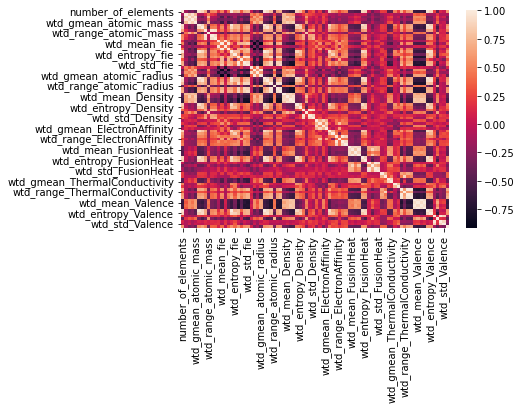

In [7]:
#plot correlation matrix using matplotlib and seaborn
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
sns.heatmap(corrmat, annot=False)

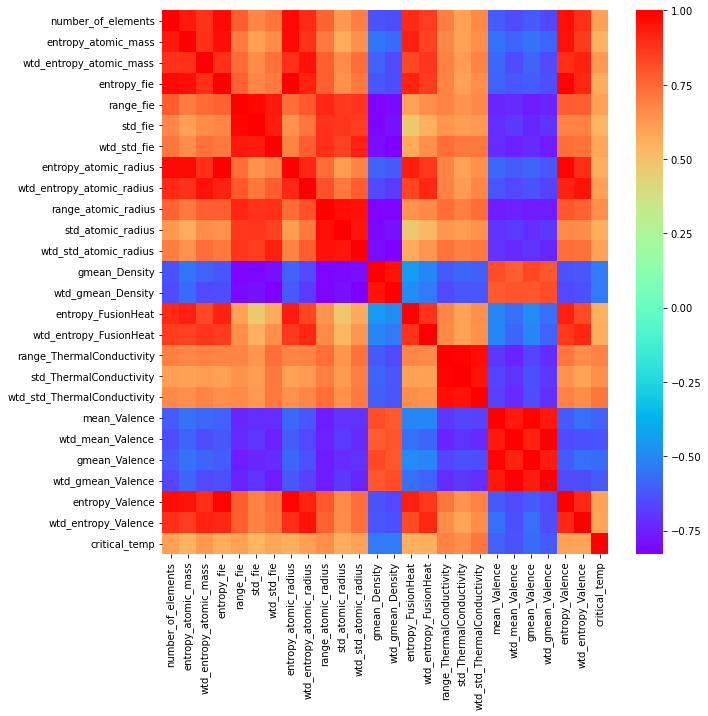

In [8]:
#choose features with correlation > 0.5
corrmat = df.corr()
top_corr_features = corrmat.index[abs(corrmat["critical_temp"])>0.5]
plt.figure(figsize=(10,10))
g = sns.heatmap(df[top_corr_features].corr(),annot=False,cmap="rainbow")

In [9]:
#create a new dataframe with selected top 20 features
df1=df[top_corr_features]
df1.head()

,number_of_elements,entropy_atomic_mass,wtd_entropy_atomic_mass,entropy_fie,range_fie,std_fie,wtd_std_fie,entropy_atomic_radius,wtd_entropy_atomic_radius,range_atomic_radius,...,range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,critical_temp
0,4,1.181795,1.062396,1.305967,810.6,323.811808,355.562967,1.259244,1.207040,205,...,399.97342,168.854244,138.517163,2.25,2.257143,2.213364,2.219783,1.368922,1.066221,29.0
1,5,1.449309,1.057755,1.544145,810.6,290.183029,354.963511,1.508328,1.204115,205,...,429.97342,198.554600,139.630922,2.00,2.257143,1.888175,2.210679,1.557113,1.047221,26.0
2,4,1.181795,0.975980,1.305967,810.6,323.811808,354.804183,1.259244,1.132547,205,...,399.97342,168.854244,138.540613,2.25,2.271429,2.213364,2.232679,1.368922,1.029175,19.0
3,4,1.181795,1.022291,1.305967,810.6,323.811808,355.183884,1.259244,1.173033,205,...,399.97342,168.854244,138.528893,2.25,2.264286,2.213364,2.226222,1.368922,1.048834,22.0
4,4,1.181795,1.129224,1.305967,810.6,323.811808,356.319281,1.259244,1.261194,205,...,399.97342,168.854244,138.493671,2.25,2.242857,2.213364,2.206963,1.368922,1.096052,23.0


### ML

In [10]:
#Splitting data into train and test dataset
from sklearn.model_selection import train_test_split
X = df1.drop(['critical_temp'], axis=1)
y = df1['critical_temp']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [11]:
#linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error, median_absolute_error, explained_variance_score, max_error
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 score is:', r2_score(y_test, y_pred))

Mean Absolute Error: 15.748455934489268
Mean Squared Error: 404.4111999990448
Root Mean Squared Error: 20.109977623036897
R2 score is: 0.6548098806448063


Text(0.5, 1.0, 'Linear Regression')

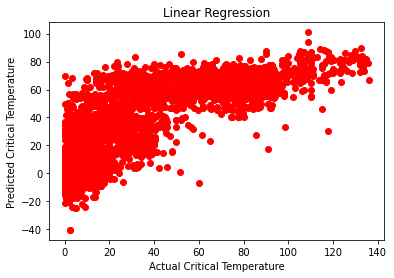

In [12]:
#regression plot
plt.scatter(y_test, y_pred, color='red')
plt.xlabel('Actual Critical Temperature')
plt.ylabel('Predicted Critical Temperature')
plt.title('Linear Regression')

In [13]:
#catboost regressor 
from catboost import CatBoostRegressor
cat = CatBoostRegressor()
cat.fit(X_train,y_train, verbose=False)
y_pred = cat.predict(X_test)

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 score is:', r2_score(y_test, y_pred))

Mean Absolute Error: 6.258849638423443
Mean Squared Error: 102.97960861420538
Root Mean Squared Error: 10.147886903893115
R2 score is: 0.9121004972444565


Text(0.5, 1.0, 'CatBoost Regression')

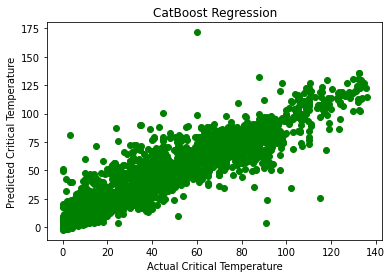

In [14]:
#regression plot which looks good

#plotting the actual critical temperature and predicted critical temperature
plt.scatter(y_test, y_pred, color='green', marker='o')
plt.xlabel('Actual Critical Temperature')
plt.ylabel('Predicted Critical Temperature')
plt.title('CatBoost Regression')


In [15]:
#random forest regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 score is:', r2_score(y_test, y_pred))

Mean Absolute Error: 5.312587830091358
Mean Squared Error: 96.21887141554816
Root Mean Squared Error: 9.80912184731886
R2 score is: 0.9178712070579806


Text(0.5, 1.0, 'Random Forest Regression')

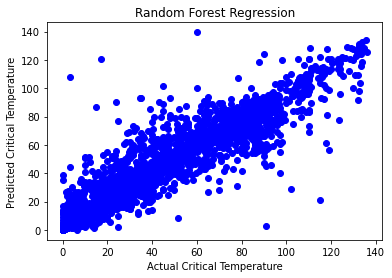

In [16]:
#regression plot
plt.scatter(y_test, y_pred, color='blue', marker='o')
plt.xlabel('Actual Critical Temperature')
plt.ylabel('Predicted Critical Temperature')
plt.title('Random Forest Regression')